# Import needed libraries

In [1]:
# python library to perform numeric operations on numpy arrays
import numpy as np

# python library to process dataframe and do analysis on them
import pandas as pd

# !pip install xlrd
# python library to deal with excel files
import xlrd

# library to deal with directories effectively
import glob 

# convert categorical feature into numbers (specifically the ownerhip status)
from sklearn import preprocessing


import matplotlib.pyplot as plt
import seaborn as sns

## Read in and merge startup data files Christoph gave

In [2]:
# Using the Pandas python library
# Load the excel datafile
# Located in the data directory which is one directory above hence the ..


path = '../data/' # use your path

allFiles = glob.glob(path + "/*.xlsx") #  all excel files


frame = pd.DataFrame()
final = []

#  merge all excel files into one
for datafiles in allFiles:
    df = pd.read_excel(datafiles, skiprows=7, skip_footer=3)
    final.append(df)
    
pitchbk_data = pd.concat(final)

#  reset indices
pitchbk_data = pitchbk_data.reset_index(drop=True)

## Investigate merged dataset

In [3]:
# Display a verbose description of the dataset
# This includes number of columns, datatype of each column, how much memory the file takes up

pitchbk_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 130 columns):
Company ID                             object
Company Name                           object
Company Former Name                    object
Company Also Known As                  object
PBId                                   object
Description                            object
Primary Industry Sector                object
Primary Industry Group                 object
Primary Industry Code                  object
All Industries                         object
Industry Vertical                      object
Company Financing Status               object
Total Raised                           float64
Business Status                        object
Ownership Status                       object
Universe                               object
Website                                object
Employees                              float64
Exchange                               object
Ticker          

In [4]:
pitchbk_data

,Company ID,Company Name,Company Former Name,Company Also Known As,PBId,Description,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,Facebook Likes Change,Facebook Likes % Change,Majestic Referring Domains,Majestic Referring Domains Change,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Profile Data Source,PitchBook Link
0,61943-41,1001Pharmacies,NaN,NaN,61943-41,Owner and operator of an online pharmacy porta...,Healthcare,Pharmaceuticals and Biotechnology,Pharmaceuticals,Pharmaceuticals*; Internet Retail,...,1.199,"2,13%",1.677,27.0,"1,64%",4.354,10.0,"0,23%",PitchBook Research,NaN
1,126697-60,24Storage,NaN,NaN,126697-60,Provider of self storage platform and services...,Business Products and Services (B2B),Commercial Services,Logistics,Logistics*; Other Commercial Services,...,0.000,"0,00%",NaN,NaN,NaN,5,0.0,"0,00%",PitchBook Research,NaN
2,60359-86,2Can,NaN,NaN,60359-86,Developer of a mobile point of sale technology...,Information Technology,Software,Financial Software,Financial Software*; Application Software; Ver...,...,1.000,"0,03%",313.000,-1.0,"-0,32%",360,1.0,"0,28%",PitchBook Research,NaN
3,81674-02,360imprimir,NaN,NaN,81674-02,Provider of an online designing and printing p...,Information Technology,Software,Social/Platform Software,Social/Platform Software*,...,37.775,"9,58%",135.000,1.0,"0,75%",509,1.0,"0,20%",PitchBook Research,NaN
4,58634-74,3D Hubs,NaN,NaN,58634-74,Developer of a three dimensional printing prod...,Business Products and Services (B2B),Commercial Services,Printing Services (B2B),Printing Services (B2B)*; Social/Platform Soft...,...,56.000,"0,13%",5.801,7.0,"0,12%",25.151,64.0,"0,26%",PitchBook Research,NaN
5,172624-96,A Cloud Guru,NaN,acloudguru,172624-96,Operator of a cloud computing training platfor...,Information Technology,Software,Educational Software,Educational Software*; Environmental Services ...,...,40.000,"0,81%",8.000,-1.0,"-11,11%",13.207,159.0,"1,22%",PitchBook Research,NaN
6,108577-54,Acast,Acast Stories,NaN,108577-54,Provider of a curated platform designed to fac...,Information Technology,Software,Application Software,Application Software*; Entertainment Software;...,...,23.000,"0,75%",6.578,48.0,"0,74%",3.964,8.0,"0,20%",PitchBook Research,NaN
7,64576-81,AccessPay,NaN,NaN,64576-81,Developer of a cloud-based payment management ...,Information Technology,Software,Financial Software,Financial Software*; Other Financial Services,...,1.000,"0,61%",436.000,3.0,"0,69%",2.491,17.0,"0,69%",PitchBook Research,NaN
8,167047-57,Achilles Therapeutics,AchillesTx,NaN,167047-57,Developer of immunotherapies for cancer. The c...,Healthcare,Pharmaceuticals and Biotechnology,Biotechnology,Biotechnology*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,NaN
9,58006-72,Adbrain,NaN,NaN,58006-72,Developer of a data intelligence platform desi...,Business Products and Services (B2B),Commercial Services,Media and Information Services (B2B),Media and Information Services (B2B)*,...,0.000,"0,00%",248.000,-2.0,"-0,80%",1.566,0.0,"0,00%",PitchBook Research,NaN


Here, the Pitchbook data says that there are 1655 rows (entries), indexed from 0 to 1654.
In addition, there are 130 columns of different datatypes (many objects like strings (ie phrases or names), a good number of numeric values (floats) and a couple date and time formatted columns). 

The result of this information implies that some cleaning and encoding of the dataset will need to be done to present it in an effective structure for the Machine Learning algorithms later on.

Finally, the dataset takes up to ~1.5 MB (a thousandth of a Gigabyte).

In [5]:
# Display the dimension of the dataframe 
# which from the info above should be 1655 rows and 130 columns

pitchbk_data.shape

(1655, 130)

(1655,130) indicates that there are 1655 startups in the dataframe and 130 attributes/features about each startup.

In [6]:
# encode names correctly
list_col_names = [name.encode('utf-8') for name in pitchbk_data.columns.values]

# get first 20 features
print(list_col_names[:20])

['Company ID', 'Company Name', 'Company Former Name', 'Company Also Known As', 'PBId', 'Description', 'Primary Industry Sector', 'Primary Industry Group', 'Primary Industry Code', 'All Industries', 'Industry Vertical', 'Company Financing Status', 'Total Raised', 'Business Status', 'Ownership Status', 'Universe', 'Website', 'Employees', 'Exchange', 'Ticker']


In [7]:
pitchbk_data['Total Raised']

0        10.60
1        37.76
2        10.67
3         7.25
4         9.83
5         6.08
6         7.58
7        10.80
8        14.80
9        15.40
10      233.45
11       24.29
12        7.44
13       11.00
14        8.70
15       11.96
16       12.52
17       11.88
18        6.35
19        7.40
20       10.38
21        7.31
22       14.37
23       11.77
24       65.76
25       16.82
26       37.00
27       10.96
28       10.45
29       10.55
         ...  
1625     31.45
1626     32.06
1627     32.95
1628     34.27
1629     35.25
1630     37.38
1631     37.58
1632     39.06
1633     43.32
1634     43.50
1635     50.00
1636     51.30
1637     66.80
1638     67.03
1639     75.36
1640     79.08
1641     89.59
1642     96.73
1643    101.98
1644    123.53
1645    131.39
1646    148.30
1647    202.97
1648    356.65
1649    490.78
1650       NaN
1651       NaN
1652       NaN
1653       NaN
1654       NaN
Name: Total Raised, Length: 1655, dtype: float64

# Choosing label

In [8]:
label_name = pitchbk_data["Total Raised"]

## Pre-process/clean dataset

In [9]:
pitchbk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Columns: 130 entries, Company ID to PitchBook Link
dtypes: datetime64[ns](2), float64(37), object(91)
memory usage: 1.6+ MB


In [10]:
# first and last financing date are the datetime attributes
pitchbk_data.select_dtypes(['datetime64'])

,First Financing Date,Last Financing Date
0,2013-03-03,2015-07-09
1,2015-05-01,2017-02-20
2,2012-10-08,2017-07-25
3,2014-04-30,2017-04-24
4,2013-04-01,2016-07-13
5,2017-07-31,2017-07-31
6,2014-02-10,2017-07-03
7,2012-07-26,2017-04-13
8,2016-10-05,2016-10-05
9,2013-07-17,2017-05-22


In [11]:
# full procedure to convert objects to categorical for easy processing
pitchbk_data = pd.concat([
        pitchbk_data.select_dtypes([], ['object', 'datetime64']),
        pitchbk_data.select_dtypes(['object', 'datetime64']).apply(pd.Series.astype, dtype='category')
        ], axis=1).reindex_axis(pitchbk_data.columns, axis=1)


In [12]:
# get all non numeric attributes
category_features = pitchbk_data.select_dtypes(['category']).columns

In [13]:
# encode categorical features
for feature in category_features:
    pitchbk_data[feature] = pitchbk_data[feature].cat.codes

In [14]:
np.sort(pitchbk_data['Company ID'].unique())

array([   0,    1,    2, ..., 1453, 1454, 1455])

1456 unique startups present out of the 1655 startups, showing that some startups may have some timescale of information added to the dataset, this could help understand how startup features change from one time point to another

In [15]:
#axis=1 relates to columns
# if all values in a column are NaN, the column is dropped
clean_numpitchbk = pitchbk_data.dropna(axis=1, how='all')

In [16]:
pitchbk_data.columns[pitchbk_data.isnull().all()].tolist()

[u'First Financing Deal Type 3',
 u'First Financing Debt Type 3',
 u'Last Financing Deal Type 3',
 u'Last Financing Debt Type 3',
 u'PitchBook Link']

These 5 colums are dropped as they contain null values throughout their columns

In [17]:
clean_numpitchbk

,Company ID,Company Name,Company Former Name,Company Also Known As,PBId,Description,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,Facebook Likes,Facebook Likes Change,Facebook Likes % Change,Majestic Referring Domains,Majestic Referring Domains Change,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Profile Data Source
0,1195,1,-1,-1,1195,844,4,28,113,725,...,909,1.199,230,1.677,27.0,377,358,10.0,112,0
1,302,4,-1,-1,302,1439,0,5,75,540,...,984,0.000,32,NaN,NaN,-1,390,0.0,89,0
2,1159,5,-1,-1,1159,237,5,33,51,389,...,644,1.000,35,313.000,-1.0,20,746,1.0,117,0
3,1285,8,-1,-1,1285,1178,5,33,125,755,...,809,37.775,363,135.000,1.0,318,819,1.0,109,0
4,1122,9,-1,-1,1122,335,0,5,114,728,...,803,56.000,45,5.801,7.0,272,527,64.0,115,0
5,699,18,-1,210,699,715,5,33,36,305,...,793,40.000,112,8.000,-1.0,149,482,159.0,206,0
6,122,25,1,-1,122,939,5,33,6,49,...,647,23.000,106,6.578,48.0,317,330,8.0,109,0
7,1247,26,-1,-1,1247,118,5,33,51,410,...,436,1.000,93,436.000,3.0,313,239,17.0,158,0
8,540,27,2,-1,540,560,4,28,14,143,...,-1,NaN,-1,NaN,NaN,-1,-1,NaN,-1,0
9,1107,35,-1,-1,1107,141,0,5,80,547,...,336,0.000,32,248.000,-2.0,60,111,0.0,89,0


3 rows were dropped (503-500)

In [18]:
for idx, elem in enumerate((clean_numpitchbk == clean_numpitchbk.iloc[0]).all()):
    if elem == True:
        print clean_numpitchbk.columns[idx]

HQ Global Region
Profile Data Source


In [19]:
# remove columns with just a constant value
clean_numpitchbk = clean_numpitchbk.loc[:, (clean_numpitchbk == clean_numpitchbk.iloc[0]).any()] 

2 columns were deleted as they had constant features: HQ Global Region and Profile Data Source. This is because all startups are within the european region. In addition, the Profile Data Source is just filled with the text "PitchBook Research"

For now Im going to set all NaN to the mean of the values in a feature/column

In [20]:
clean_numpitchbk = clean_numpitchbk.fillna(clean_numpitchbk.mean())

## Normalising data (by making features have a similar mean and variance) - store for now to see if performance improves later

In [21]:
df = clean_numpitchbk

# subtract each attribute by its mean
# divide by its standard deviation
normalised_numpitchbk = (df-df.mean()) / (df.std())

This dataset currently has 1655 samples and 125 features

## Investigate different clustering and dimensionality reduction techniques to visualise and understand data

In [22]:
from __future__ import print_function, division
%matplotlib inline

import collections


from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold

In [23]:
clean_numpitchbk.describe()

,Company ID,Company Name,Company Former Name,Company Also Known As,PBId,Description,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,Facebook Likes,Facebook Likes Change,Facebook Likes % Change,Majestic Referring Domains,Majestic Referring Domains Change,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Profile Data Source
count,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,...,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.0
mean,721.677946,725.709970,7.841088,15.240483,721.677946,734.694864,3.511178,24.694260,53.645317,387.701511,...,418.330514,49.889709,75.862236,142.755996,1.413844,204.073716,482.352870,12.462085,116.997583,0.0
std,423.861838,420.420618,29.335911,46.151309,423.861838,429.204322,1.956841,11.046874,40.669271,246.868463,...,368.532716,117.999268,90.718650,176.301107,25.027571,143.628895,359.187463,48.308632,95.963346,0.0
min,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-802.000000,-1.000000,1.000000,-342.000000,-1.000000,-1.000000,-428.000000,-1.000000,0.0
25%,355.500000,361.500000,-1.000000,-1.000000,355.500000,363.500000,1.000000,16.000000,19.000000,173.000000,...,-1.000000,1.000000,-1.000000,25.000000,-1.000000,60.500000,131.500000,0.000000,33.500000,0.0
50%,712.000000,727.000000,-1.000000,-1.000000,712.000000,733.000000,5.000000,33.000000,49.000000,378.000000,...,374.000000,12.000000,40.000000,94.000000,0.000000,266.000000,495.000000,4.000000,102.000000,0.0
75%,1098.500000,1089.000000,-1.000000,-1.000000,1098.500000,1109.500000,5.000000,33.000000,86.500000,594.500000,...,737.500000,49.889709,106.000000,146.500000,1.413844,266.000000,783.000000,12.462085,162.000000,0.0
max,1455.000000,1460.000000,159.000000,217.000000,1455.000000,1479.000000,6.000000,35.000000,138.000000,861.000000,...,1116.000000,979.000000,365.000000,986.000000,808.000000,513.000000,1147.000000,718.000000,394.000000,0.0


In [24]:
X = clean_numpitchbk.drop(labels=["Total Raised"], axis=1, inplace=False)

# y is a vector of categories
y = np.array(label_name)

In [25]:
y = np.nan_to_num(y)

In [26]:
y = pd.DataFrame(y, columns=["Total Raised"])

In [27]:
y["Total Raised"].value_counts()

1.00      32
6.00      16
7.00      15
1.50      14
2.00      14
3.00      13
10.00     13
0.60      12
0.94      11
0.50      11
1.20      11
4.00      11
2.50      11
0.85      10
3.50      10
1.10       9
1.60       8
0.70       8
5.00       8
0.75       8
6.50       7
1.02       7
11.00      6
1.30       6
0.00       6
2.10       6
8.50       6
0.80       5
0.88       5
9.00       5
          ..
11.96      1
8.54       1
124.18     1
19.02      1
47.10      1
43.50      1
27.84      1
87.15      1
17.98      1
13.30      1
43.24      1
0.98       1
2.99       1
4.06       1
3.81       1
16.80      1
20.54      1
6.17       1
0.15       1
29.53      1
16.11      1
31.38      1
3.99       1
9.26       1
8.18       1
58.18      1
7.44       1
22.11      1
2.65       1
5.85       1
Name: Total Raised, Length: 934, dtype: int64

The dataset seems to be diverse enough to do the supervised learning task of regression as the outputs are continuous values (real numbers).

As mentioned this is a regression task and will be evaluated based on Root Mean Square Error between the predictions and the true labels.

# Task: Visualise the labels

In [28]:
df = y["Total Raised"].value_counts().to_frame()

In [29]:
df = df.reset_index()

df.columns = ['total raised', 'count']

In [30]:
df = df.sort_values('total raised')

In [31]:
df

,total raised,count
24,0.00,6
922,0.15,1
789,0.23,1
446,0.44,1
9,0.50,11
214,0.51,2
61,0.52,4
312,0.53,2
96,0.54,3
207,0.55,2


In [32]:
x_vals = df['total raised'].values

In [33]:
y_vals = df['count'].values

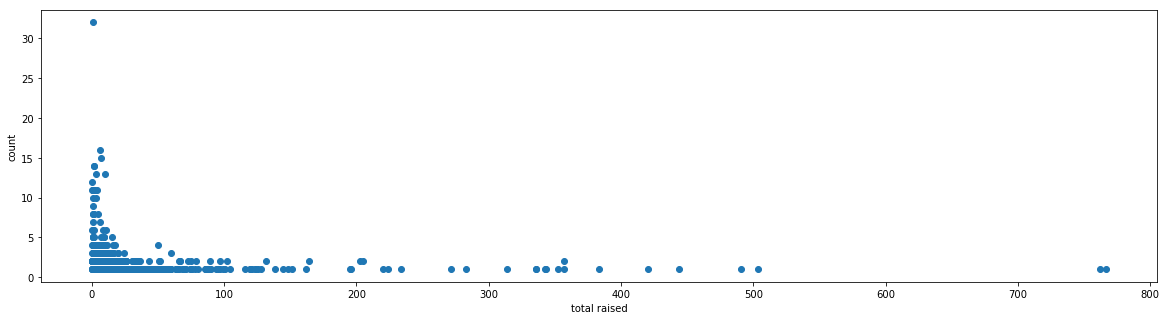

In [34]:
plt.figure(figsize=(20,5))
plt.scatter(x_vals,y_vals)
plt.xlabel('total raised')
plt.ylabel('count')
plt.show()


Observation:
    
Most of the values are concentrated around the 0 value (positively), whereas the highest total raised is around 760 million in this dataset

# Task: Split the dataset

Split the pitchbook dataset into training, validation and testing sets so as to effectively evaluate models used.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Split into training (60%), validation (20%), test set (20%)
X_trainval, X_test, y_trainval, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=1)
del X, y # to release memory

X_train, X_val, y_train, y_val = \
    train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=1)
del X_trainval, y_trainval # to release memory

In [37]:
y_train

,Total Raised
1269,2.40
1388,4.00
293,35.60
250,26.10
1604,20.30
1627,32.95
1518,8.57
105,10.18
754,1.46
1605,20.56


In [44]:
y_train.mean().values

array([ 19.70049345])

In [45]:
y_test.mean().values

array([ 15.17622356])

In [43]:
y_val.mean().values

array([ 19.25208459])

the training and validation labels are centred around similar values of 19~ million euros in terms of total raised

the held out testing dataset has a mean of ~15 million euros

# Task: Experiment Machine learning (statistical) models

In [59]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [60]:
# Ordinary Least Squares Regression

In [61]:
# Create linear regression object
ols_reg = LinearRegression()

# Train the model using the training sets
ols_reg.fit(X=X_train, y=y_train)

# Make predictions using the validation set
predicted_val = ols_reg.predict(X=X_val)
true_val = y_val


# The mean squared error (lower being better)
# Better prediction and true validation data
print("Mean squared error: %.2f"
      % mean_squared_error(true_val, predicted_val))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(true_val, predicted_val))



# The coefficients of the linear regression model
print('Coefficients: \n', ols_reg.coef_)



Mean squared error: 1137.91
Variance score: 0.67
Coefficients: 
 [[ -1.98463360e+12   1.46484375e-03  -8.91113281e-03   2.03247070e-02
    1.98463360e+12   1.09863281e-03   1.07147217e+00  -7.45697021e-02
   -1.96105957e-01   3.38363647e-02  -1.19895935e-02   9.51924324e-01
    3.27650189e-01  -3.22260427e+00   1.92074424e+00  -4.03976440e-03
    4.25548553e-02  -1.17954973e+00  -1.17958121e+00  -4.81273293e-01
   -1.53048444e+00  -1.03483137e+00   1.54597878e-01  -5.87062836e-02
    1.05952358e+00   2.56919861e-03  -2.46334076e-03  -5.03158569e-03
    4.08554077e-03  -1.63078308e-04  -2.46505737e-02   2.02178955e-04
   -1.16500854e-02   5.40018082e-04   1.66184625e+00  -1.65414810e-03
    3.38299274e-02   1.73997879e-03   1.42632961e-01  -4.27436829e-03
    2.50339508e-06   1.68474630e+00  -9.12094116e-03  -5.32531738e-03
    1.08948249e+00  -1.98959033e+00   2.42598057e-02  -2.68697080e+01
    8.34035873e-03   4.01577473e-01   3.78570899e+01   2.09360123e-02
    1.22494698e-02  -4.05

In [62]:
# Regularised linear regression

In [80]:
# Lasso Regression

# Create lasso regression object
lasso_reg = LassoCV()

# Train the model using the training sets
lasso_reg.fit(X=X_train, y=y_train)

# Make predictions using the validation set
predicted_val = lasso_reg.predict(X=X_val)
true_val = y_val


# The mean squared error (lower being better)
# Better prediction and true validation data
print("\nMean squared error: %.2f"
      % mean_squared_error(true_val, predicted_val))

# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(true_val, predicted_val))


# best setting of regularisation coefficient
print('\nRegularisation coefficient: \n', lasso_reg.alpha_)

# The coefficients of the lasso regression model
print('\nCoefficients: \n', lasso_reg.coef_)

cond = np.where(lasso_reg.coef_ != 0)[0]

cond.size



Mean squared error: 1021.32

Variance score: 0.71

Regularisation coefficient: 
 5.41278989208

Coefficients: 
 [  4.68040445e-03   3.53129496e-03  -1.14115195e-02   1.53153033e-02
   4.12305568e-05   1.91136159e-03   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   4.09098089e-03  -4.21213600e-03  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -4.89581529e-03
   4.92584175e-02   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -5.34525751e-02
   2.76932646e-01   1.60876300e-03   2.57643028e-04  -2.34779391e-03
   2.60457815e-04   4.25085960e-03  -3.19588526e-02  -1.12677021e-03
  -2.59406943e-03  -0.00000000e+00   0.00000000e+00   6.69334710e-03
   1.15011185e-01   0.00000000e+00   7.38091640e-02  -4.48576031e-03
   0.00000000e+00   0.00000000e+00  -5.82398204e-03  -6.43339746e-03
   5.04018608e-01  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   7.67309146e-03   1.37566433e-01  -0.00000000e+00   2.747

73

Using the lasso regression model, it implicitly gives information about features that it thinks are important. Here it has retrieved 73 out of the 118 features that are important. It then takes a weighted sum of these

In [68]:
# Ridge Regression

# Create ridge regression object
ridge_reg = RidgeCV()

# Train the model using the training sets
ridge_reg.fit(X=X_train, y=y_train)

# Make predictions using the validation set
predicted_val = ridge_reg.predict(X=X_val)
true_val = y_val


# The mean squared error (lower being better)
# Better prediction and true validation data
print("\nMean squared error: %.2f"
      % mean_squared_error(true_val, predicted_val))

# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(true_val, predicted_val))


# best setting of regularisation coefficient
print('\nRegularisation coefficient: \n', ridge_reg.alpha_)

# The coefficients of the linear regression model
print('\nCoefficients: \n', ridge_reg.coef_)




Mean squared error: 1061.51

Variance score: 0.70

Regularisation coefficient: 
 10.0

Coefficients: 
 [[  2.00633305e-03   2.83656398e-03  -6.77995286e-03   2.11105545e-02
    2.00633305e-03   8.68718525e-04   9.94194999e-01  -7.41703184e-02
   -2.00258171e-01   3.52234080e-02  -1.16684345e-02   5.63432305e-01
    3.45024961e-01  -3.38782574e+00   1.87675214e+00  -4.17561119e-03
    4.30643100e-02  -7.82773349e-01  -7.82773349e-01  -5.00753536e-01
   -1.82583353e+00  -1.02459277e+00   1.64485849e-01  -6.00262162e-02
    9.78575330e-01   1.77119614e-03  -1.97208549e-03  -4.76969476e-03
    3.44804488e-03   2.96609202e-04  -2.78452392e-02   4.62218377e-05
   -1.08546615e-02   3.32299403e-03   1.52814710e+00  -9.20980077e-04
    4.03720076e-02   1.45769268e-03   1.39149916e-01  -4.31961332e-03
    0.00000000e+00   1.53479255e+00  -8.85953825e-03  -5.00745130e-03
    1.08604843e+00  -1.61917671e+00   9.50821065e-03  -1.15941265e+01
    8.48096145e-03   4.06083914e-01   9.44718441e+00   2

Due to the low R2 score (variance explained) of the best linear regression (with/without regularisation) from Lasso Regression (0.71). We can try to improve the performance of the regression model. It must also be mentioned that for financial data, it is historically difficult to predict but I think it could be possible.


There are possible methods I could investigate to move forward like K-nearest neighbours and Neural Networks